# K láng giềng gần nhất (K-Nearest Neighbor)

Bộ phân lớp kNN bao gồm 2 giai đoạn:
- Trong quá trình huấn luyện, bộ phân lớp lấy dữ liệu huấn luyện và ghi nhớ chúng.
- Trong quá trình kiểm tra, kNN phân lớp từng dữ liệu kiểm tra bằng cách so sánh dữ liệu đó với tất cả các dữ liệu huấn luyện và tìm ra nhãn của `k ví dụ gần nhất`.
- Giá trị của tham số `k` được kiểm định chéo.

Trong bài tập này, bạn sẽ lần lượt cài đặt từng bước này và hiểu được cách xây dựng một bộ phân lớp hoàn chỉnh.

In [1]:
# Import một số thư viện cần thiết.
import random
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

# Sử dụng một mẹo nhỏ để vẽ hình trên cùng một dòng thay vì mở cửa sổ mới
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # đặt kích thước mặc định cho hình
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Một mẹo nhỏ để notebook tự load lại các module bên ngoài;
# xem thêm tại http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Tải dữ liệu hoa cẩm chướng từ Scikit-learn.
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, \
                                                    iris.target, test_size=0.2)

# In ra kích thước dữ liệu huấn luyện và dữ liệu kiểm tra như một 
# phép thử đơn giản.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (120, 4)
Training labels shape:  (120,)
Test data shape:  (30, 4)
Test labels shape:  (30,)


In [3]:
from k_nearest_neighbor import KNearestNeighbor

# Khởi tạo bộ phân lớp kNN. 
# Ghi nhớ rằng quá trình huấn luyện kNN chỉ đơn giản là ghi  nhớ dữ liệu. 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

Bây giờ chúng ta cần cài đặt giai đoạn thứ hai: Phân loại dữ liệu kiểm tra. Chúng ta có thể chia giai đoạn này thành hai bước: 

1. Đầu tiên, chúng ta phải tính được khoảng cách giữa tất cả các dữ liệu kiểm tra so với tất cả các dữ liệu huấn luyện. 
2. Với những khoảng cách đó, tìm ra `k láng giềng gần nhất ` cho mỗi dữ liệu và bỏ phiếu cho nhãn của dữ liệu đó.

Hãy bắt đầu với việc tính ma trận khonagr cách giữa tất cả các dữ liệu huấn luyện và kiểm tra. Ví dụ nếu có **Ntr** dữ liệu huấn luyện và **Nte** dữ liệu kiểm tra, kết quả thu được là ma trận kích thước **Nte x Ntr** với mỗi phần tử (i,j) là khoảng cách giữa dữ liệu kiểm tra i và dữ liệu kiểm tra j.

Đầu tiên, mở `k_nearest_neighbor.py` và cài đặt hàm `compute_distances_two_loops` sử dụng 2 vòng lặp (không hiệu quả) cho mỗi cặp dữ liệu (kiểm tra, huấn luyện) và tính khoảng ma trận khoảng cách cho từng phần tử một.

In [4]:
# Mở k_nearest_neighbor.py và cài đặt compute_distances_two_loops.

# Kiểm tra phần cài đặt của bạn:
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(30, 120)


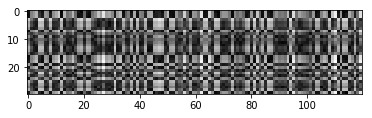

In [5]:
# Chúng ta có thể biểu diễn ma trận khoảng cách: mỗi hàng là một dữ liệu kiểm tra
# và khoảng cách của nó đến các dữ liệu huấn luyện
plt.imshow(dists, interpolation='none')
plt.show()

In [6]:
# Bây giờ, cài đặt hàm predict_labels và chạy code dưới đây:
# Chúng ta dùng k = 1 (Số lượng hàng xóm gần nhất).
num_test = X_test.shape[0]
y_test_pred = classifier.predict_labels(dists, k=1)

# Tính ra in ra tỉ lệ những ví dụ dự đoán đúng
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 30 / 30 correct => accuracy: 1.000000


Bạn nên hi vọng đạt được kết quả xấp xỉ 30%. Giờ hãy thử với số láng giềng nhiều hơn, k = 5:

In [7]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 30 / 30 correct => accuracy: 1.000000


Bạn nên hi vọng kết quả đạt được tốt hơn so với k = 1.

In [8]:
# Giờ hãy thử tăng tốc tính toán bằng cách vectorize một phần với một vòng lặp.
# Cài đặt hàm compute_distances_one_loop và chạy code sau:
dists_one = classifier.compute_distances_one_loop(X_test)

# Để đảm bảo bạn cài đặt đúng, chúng ta so sánh kết quả với cài đặt ngây thơ trước
# đó (2 vòng lặp). Có rất nhiều cách để kiểm tra hai ma trận có giống nhau hay 
# không; một cách đơn giản nhất là chuẩn Frobenius. Chuẩn Frobenius của 2 ma trận
# là căn bậc hai tổng khoảng cách của tất cả các phần tử; nói cách khác, chuyển
# ma trận về dạng vector và tính khoảng cách Euclidean của chúng.

difference = np.linalg.norm(dists - dists_one, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


In [9]:
# Bây giờ hãy cài đặt vectorize hoàn chỉnh trong computr_distances_no_loops và
# chạy code sau:
dists_two = classifier.compute_distances_no_loops(X_test)

# kiểm tra ma trận khoảng cách có khớp với kết quả chúng ta đã tính trước đó
# không:
difference = np.linalg.norm(dists - dists_two, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


In [10]:
# Giờ hãy thử xem cài đặt này nhanh như thế nào
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print('No loop version took %f seconds' % no_loop_time)

# bạn sẽ thấy rằng bản cài đặt fully-vectorized (no loop) nhanh hơn rất nhiều

Two loop version took 0.028906 seconds
One loop version took 0.006516 seconds
No loop version took 0.000368 seconds


### Kiểm định chéo (Cross-validation)

Chúng ta đã cài đặt bộ phân lớp K láng giềng gần nhất nhưng chúng ta thấy rằng k = 5 được chọn tùy ý. Chúng ta sẽ xác định giá trị tốt nhất cho siêu tham số này với kiểm định chéo.

In [30]:
from sklearn.model_selection import KFold
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []
X_test_folds = []
y_test_folds = []
################################################################################
# TODO:                                                                        #
# Chia dữ liệu huấn luyện ra thành các nhánh. Sau khi chia, X_train_folds và   #
# y_train_folds phải là các mảng có độ dài num_folds, với y_train_folds[i] là  #
# là vector nhãn cho các điểm trong X_train_folds[i].                          #
# Gợi ý: Tìm kiếm trong numpy hàm array_split.                                 #
################################################################################
kf = KFold(n_splits= num_folds)
for train, test in kf.split(X_train):
    X_train_folds.append(X_train[train])
    y_train_folds.append(y_train[train])
    X_test_folds.append(X_train[test])
    y_test_folds.append(y_train[test])
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# Một từ điển chứa hiệu năng cho các giá trị khác nhau của k mà chúng ta tìm 
# được khi chạy kiểm định chéo. Sau khi chạy kiểm định chéo, k_to_accuracies[k] 
# nên là mảng có độ dài num_folds chứa các giá trị hiệu năng khác nhau mà ta 
# tìm được với các giá trị k khác nhau.
k_to_accuracies = {}

################################################################################
# TODO:                                                                        #
# Dùng kiểm định chéo k lần để tìm ra giá trị tốt nhất của k. Với mỗi giá trị  #
# k, chạy thuật toán k-nearest-neighbor num_folds lần, với mỗi trường hợp sử   #
# num_folds-1 nhánh làm tập  huấn luyện và nhánh còn lại làm tập kiểm tra.    #
# Lưu hiệu năng cho mỗi nhánh và tất cả các giá trị k vào k_to_accuracies      #
################################################################################
for k_ in k_choices:
    for i in range(num_folds):
        classifier.train(X_train_folds[i], y_train_folds[i])
        dists = classifier.compute_distances_no_loops(X_test_folds[i])
        pred = classifier.predict_labels(dists, k=k_)
        # Tính ra in ra tỉ lệ những ví dụ dự đoán đúng
        num_correct = np.sum(pred == y_test_folds[i])
        accuracy = float(num_correct) / X_test_folds[i].shape[0]
        if k_ not in k_to_accuracies:
            k_to_accuracies[k_] = [accuracy]
        else:
            k_to_accuracies[k_].append(accuracy)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# In ra hiệu năng tính toán được
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.958333
k = 1, accuracy = 1.000000
k = 1, accuracy = 0.916667
k = 1, accuracy = 1.000000
k = 1, accuracy = 0.875000
k = 3, accuracy = 0.958333
k = 3, accuracy = 1.000000
k = 3, accuracy = 0.958333
k = 3, accuracy = 1.000000
k = 3, accuracy = 0.916667
k = 5, accuracy = 0.958333
k = 5, accuracy = 0.958333
k = 5, accuracy = 0.958333
k = 5, accuracy = 1.000000
k = 5, accuracy = 0.916667
k = 8, accuracy = 0.875000
k = 8, accuracy = 1.000000
k = 8, accuracy = 0.958333
k = 8, accuracy = 1.000000
k = 8, accuracy = 0.916667
k = 10, accuracy = 0.875000
k = 10, accuracy = 0.958333
k = 10, accuracy = 0.958333
k = 10, accuracy = 1.000000
k = 10, accuracy = 0.916667
k = 12, accuracy = 0.916667
k = 12, accuracy = 1.000000
k = 12, accuracy = 0.958333
k = 12, accuracy = 1.000000
k = 12, accuracy = 0.875000
k = 15, accuracy = 0.916667
k = 15, accuracy = 0.958333
k = 15, accuracy = 0.916667
k = 15, accuracy = 1.000000
k = 15, accuracy = 0.958333
k = 20, accuracy = 0.875000
k = 20, accu

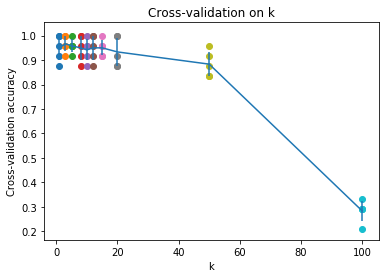

In [31]:
# vẽ ra bản quan sát thô
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# vẽ ra đường xu hướng với thanh lỗi ứng với độ lệch chuẩn
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [29]:
# Dựa trên kết quả kiểm định chéo ở trên, chọn ra giá trị k tốt nhất, huấn luyện
# lại mô hình sử dụng toàn bộ dữ liệu huấn luyện, và kiểm tra nó trên toàn bộ 
# tập kiểm tra.
best_k = 20

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Tính ra in ra hiệu năng
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 30 / 30 correct => accuracy: 1.000000
